<a href="https://www.kaggle.com/code/singhayush16/titanic-survival?scriptVersionId=140779585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
titanic=pd.read_csv('https://github.com/codebasics/py/raw/master/ML/9_decision_tree/Exercise/titanic.csv',index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df=titanic[['Pclass','Survived','Sex','Age','Fare']]
df.head()

,Pclass,Survived,Sex,Age,Fare
PassengerId,,,,,
1,3,0,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,3,1,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,3,0,male,35.0,8.0500


In [14]:
from sklearn.preprocessing import LabelEncoder
le_Sex=LabelEncoder()

In [15]:
df1=df.drop(['Sex'],axis=1)
df1['Gender']=le_Sex.fit_transform(df['Sex'])
df1

,Pclass,Survived,Age,Fare,Gender
PassengerId,,,,,
1,3,0,22.0,7.2500,1
2,1,1,38.0,71.2833,0
3,3,1,26.0,7.9250,0
4,1,1,35.0,53.1000,0
5,3,0,35.0,8.0500,1
...,...,...,...,...,...
887,2,0,27.0,13.0000,1
888,1,1,19.0,30.0000,0
889,3,0,NaN,23.4500,0


In [26]:
df1.isnull().sum()

Pclass      0
Survived    0
Age         0
Fare        0
Gender      0
dtype: int64

In [21]:
df1.Age.interpolate(inplace=True)

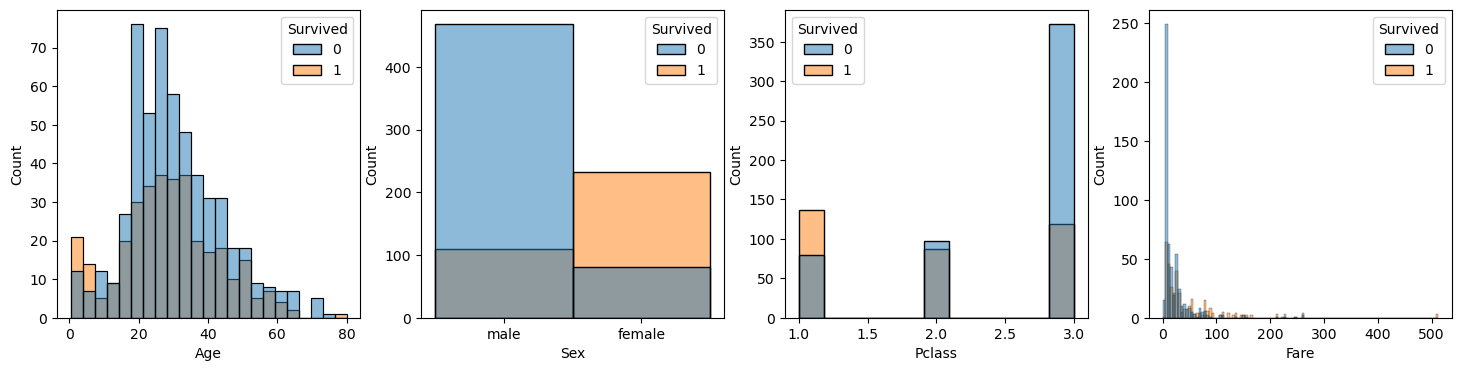

In [47]:
fig,axes=plt.subplots(1,4,figsize=(18,4))
sns.histplot(ax=axes[0],data=df1,x='Age',hue='Survived')
sns.histplot(ax=axes[1],data=df,x='Sex',hue='Survived')
sns.histplot(ax=axes[2],data=df1,x='Pclass',hue='Survived')
sns.histplot(ax=axes[3],data=df,x='Fare',hue='Survived')
plt.show()

In [22]:
y=df1['Survived']
X=df1.drop(['Survived'],axis=1)

In [23]:
X.shape,y.shape

((891, 4), (891,))

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [96]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_leaf_nodes=90,random_state=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=90, random_state=10)

In [82]:
y_pred=model.predict(X_test)

In [83]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [97]:
model.score(X_test,y_test)

0.8659217877094972

In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [86]:
cm

array([[104,  13],
       [ 11,  51]])

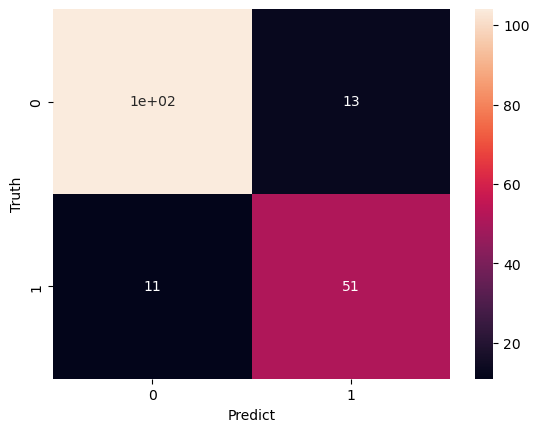

In [85]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

*The model is **86.59%** accurate.*